In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
new = pd.read_pickle('drive/MyDrive/benchmark/question_new_results_FINAL_2.pkl')
old = pd.read_pickle('drive/MyDrive/benchmark/question_old_results_FINAL_2.pkl')

In [ ]:
new

,index,cid,compdname,desc,wiki_summarized,question,results,gpt_base_results
0,0,168464,Silver hexafluorophosphate,"Silver hexafluorophosphate, sometimes referred...","Silver hexafluorphosphate, also known as silve...",The compound The compound also known as The co...,"Unfortunately, there is no information provide...",Silver hexafluorophosphate is an inorganic com...
1,1,9831659,Ipamorelin,Ipamorelin (INN) (developmental code name NNC ...,IpaMorelin is a selective agonist for the grow...,The compound is a selective agonist for the gr...,Ipamorelin is a peptide compound that belongs ...,Ipamorelin is a synthetic peptide hormone that...
2,2,5311309,Nateglinide,"Nateglinide (INN, trade name Starlix) is a dru...",Nateglinaide is a blood glucose lowering drug ...,The compound is a blood glucose lowering drug ...,Nateglinide is a medication used to treat type...,Nateglinide is a medication that belongs to th...
3,3,5282096,Caffeyl alcohol,Caffeyl alcohol is the organic compound with t...,Caffeyl Alcohol is a colorless solid that can ...,The compound The compound is a colorless solid...,Caffeyl alcohol is an organic compound that be...,"Caffeyl alcohol, also known as caffeic alcohol..."
4,4,439318,Bekanamycin,Bekanamycin (INN; kanamycin B) is an aminoglyc...,This article is about an amino-glycosidic anti...,This article is about an amino-glycosidic anti...,"I'm sorry, but there is no information about B...",Bekanamycin is an aminoglycoside antibiotic de...
...,...,...,...,...,...,...,...,...
987,996,9915879,Mexoryl,Mexoryl is the trade name of a number of UV ab...,MexorYL is the name of an ultraviolet absorber,The compound is the name of an ultraviolet abs...,Mexoryl is a chemical compound that belongs to...,Mexoryl is a chemical compound that belongs to...
988,997,5359967,Indium,Indium is a chemical element with the symbol I...,"Indium, a soft metal with an alkali appearance...","The compound, a soft metal with an alkali appe...",Indium is a metallic element with the atomic s...,Indium is a chemical element with the atomic s...
989,998,6327608,Benzeneselenol,"Benzeneselenol, also known as selenophenol, is...",The organoslesium compound benzeneseleneol is ...,The organoslesium compound The compound is a c...,Benzeneselenol is an organoselenium compound w...,"Benzeneselenol, also known as phenylselenol, i..."
990,999,64735,Lanthanum(III) chloride,Lanthanum chloride is the inorganic compound w...,Lanthium chloride is a mineral used in chemist...,The compound The compound is a mineral used in...,Lanthanum(III) chloride is a compound consisti...,"Lanthanum(III) chloride, also known as lanthan..."


In [ ]:
df = pd.concat((new, old))

In [ ]:
def create_dict(answer):
  try:
    arr = answer.split("\n")
  except AttributeError:
    return
  answer = answer.replace('\n', ' ')
  d = {'description':''}
  for el in arr:
    if ':' not in el or len(el.split(':')) <= 1:
      d['description'] += el
    else:
      if len(el.split(':')[1]) > 0:
        d[' '.join(el.split(':')[0].split(' ')[1:])] = el.split(':')[1]

  x = answer.replace('. ', ' ').replace(', ', ' ').split()
  try:
    d['Molecular Weight'] = float(x[x.index('g/mol')-1])
    d['Polar Area'] = float(x[x.index('angstroms')-2])
    d['Molecular Formula']  = x[x.index('formula')+2]
  except:
    pass

  d['Appearance'] = ''
  d['Solubility'] = ''
  d['Density'] = ''
  d['Reactivity'] = ''
  d['Stability'] = ''
  d['Toxicity'] = ''
  d['Boiling Point'] = ''
  d['Melting Point'] = ''
  for sentence in answer.split('. '):
    if "color" in sentence:
      d['Appearance'] += sentence
    if "hardness" in sentence:
      if d['Appearance']:
        d['Appearance'] += '. '
      d['Appearance'] += sentence

    if "solub" in sentence:
      if d['Solubility']:
        d['Solubility'] += '. '
      d['Solubility'] += sentence

    if 'density' in sentence:
      if d['Density']:
        d['Density'] += '. '
      d['Density'] += sentence

    if 'react' in sentence:
      if d['Reactivity']:
        d['Reactivity'] += '. '
      d['Reactivity'] += sentence

    if 'tox' in sentence:
      if d['Toxicity']:
        d['Toxicity'] += '. '
      d['Toxicity'] += sentence

    if 'stab' in sentence:
      if d['Stability']:
        d['Stability'] += '. '
      d['Stability'] += sentence

    if 'boil' in sentence:
      if d['Boiling Point']:
        d['Boiling Point'] += '. '
      d['Boiling Point'] += sentence

    if 'melt' in sentence:
      if d['Melting Point']:
        d['Melting Point'] += '. '
      d['Melting Point'] += sentence

  if d == {}:
    return answer
  return d

In [ ]:
import random
n = random.randrange(len(new))
create_dict(new['results'][n])


{'description': "Potassium arsenate is a chemical compound that consists of potassium cations (K+) and arsenate anions (AsO4^3-). Unfortunately, there is no specific information about potassium arsenate in the provided context. However, we can make some educated guesses based on general knowledge of similar compounds.Potassium arsenate is likely to be a solid compound at room temperature, given that most potassium compounds are solid. It may have a white or colorless appearance, as many potassium salts tend to be white or colorless in their solid form.In terms of solubility, potassium arsenate may be soluble in water to some extent. This is because most potassium salts are water-soluble, meaning they can dissolve in water to form a homogeneous solution. However, it is important to note that the solubility of potassium arsenate can vary depending on the specific conditions and concentration.Reactivity-wise, arsenates are generally considered to be toxic and potentially hazardous. They c

In [ ]:
new['results'][238]

'The molecule alpha-D-glucopyranosyl-(1->4)-alpha-D-glucopyranosyl-(1->4)-alpha-D-glucopyranosyl-(1->4)-alpha-D-glucopyranosyl-(1->4)-alpha-D-glucopyranose is a polysaccharide consisting of five glucose units linked together by alpha-glycosidic bonds. \n\nBased on prior knowledge of similar compounds, it is likely that this molecule is a type of starch or cellulose, which are polysaccharides composed of glucose units. Starch is typically a white, odorless powder, while cellulose is a fibrous, insoluble substance. Therefore, it is reasonable to assume that this molecule may have similar physical properties.\n\nDensity: The density of this compound is not specified in the given context, but polysaccharides generally have densities similar to other carbohydrate compounds, which range from 1.5 to 2.0 g/cm^3.\n\nSolubility: Polysaccharides like starch and cellulose are typically insoluble in organic solvents such as ethanol and ether. However, they are generally soluble in water, forming co

In [ ]:
description_df = pd.read_pickle('drive/MyDrive/df_pseudo_1k_missing.pkl')

In [ ]:
df['wiki_summarized'][311]

311    The urea nitrate is an explosive that can be u...
311    Thiamine diphosphate, or thiamine pyrophosphor...
Name: wiki_summarized, dtype: object

In [ ]:
df = pd.concat([new.rename(columns={"compdname":"cmpdname"}), old]).reset_index(drop=True)

In [ ]:
df['cmpdname'][1718]

'Ebselen'

In [ ]:
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer, util


# load our Sentence Transformers model pre trained!!
model = SentenceTransformer('m3/m3-experiment-roberta-base-chemprot-word-swapping-embedding-3')

Some weights of RobertaModel were not initialized from the model checkpoint at /root/.cache/torch/sentence_transformers/m3_m3-experiment-roberta-base-chemprot-word-swapping-embedding-3 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compare(s1, s2):
  try:
    s1 = model.encode(s1)
    s2 = model.encode(s2)
    return float(util.cos_sim(s1, s2)[0])
  except:
    return 0

In [ ]:
import re
def calculate_score(prop_dict, pred_dict):
  score = 1
  if pred_dict is None:
    return 0
  for pred in pred_dict:
    # try:
    for prop in prop_dict:
      if pred.lower() == prop.lower() == 'description' and pred_dict[pred] is not None and prop_dict[prop] is not None:
        try:
          sim = compare(pred_dict[pred], prop_dict[prop])
          score *= sim
        except:
          # print(pred_dict
          pass



  return score

In [ ]:
n = 392
compare(get_properties(new['compdname'][n], 'compdname'), new['results'][n]), compare(get_properties(new['compdname'][n], 'compdname'), new['gpt_base_results'][n])#compare(get_properties(new['compdname'][i], 'compdname'), new['results'][i]) for i in range(len(new))

(0.4984356164932251, 0.3610617518424988)

In [ ]:
get_properties(new['compdname'][n], 'compdname')

'Prostaglandsin is a class of lipid compounds that have diverse effects in animal and human tissue. They were first isolated by the physiologist, Ulf Von Euler ; they are produced almost all tissues including blood vessels as well platelets through their role vasodilating function'

In [ ]:
new['results'][n]

'Prostaglandin is a naturally occurring compound that belongs to a group of lipid molecules known as eicosanoids. It is derived from arachidonic acid, a polyunsaturated fatty acid. Prostaglandins play a crucial role in various physiological processes, including inflammation, immune response, blood clotting, and regulation of blood pressure.\n\nIn terms of physical properties, prostaglandins are typically oily liquids with a range of melting points and boiling points depending on their specific structure. Due to their lipid nature, they are generally insoluble in water but soluble in organic solvents such as ethanol or chloroform.\n\nProstaglandins are highly reactive compounds and can undergo various chemical reactions. They can be oxidized, reduced, or undergo enzymatic modifications to produce different prostaglandin derivatives. The reactivity of prostaglandins is influenced by the functional groups present in their structure, such as hydroxyl, carbonyl, and double bonds.\n\nThe app

In [ ]:
create_dict(new['gpt_base_results'][n+4])

{'description': 'Diethylstilbestrol (DES) is a synthetic nonsteroidal estrogen that belongs to the stilbestrol group of compounds. It is derived from stilbene, a hydrocarbon that consists of a trans double bond between two phenyl groups. DES has a molecular formula of C18H20O2.Physically, DES appears as a white or off-white crystalline powder with a melting point around 169-171°C. It has a molecular weight of approximately 268.35 g/mol. Additionally, DES has a moderate to low density, usually around 1.142 g/cm^3.DES is sparingly soluble in water but dissolves well in organic solvents such as ethanol, acetone, and ethyl ether. Its solubility in water can be improved with the addition of certain surfactants or organic solvents. This limited solubility in water is due to its hydrophobic nature, as it primarily interacts with nonpolar solvents.Reactivity-wise, DES is known for its estrogenic activity. As an estrogen analog, it can bind to estrogen receptors in the body, accompanying simila

In [ ]:
compare(new['gpt_base_results'][31], new['wiki_summarized'][31])

In [ ]:
for i in range(len(old)):
  if len(old['wiki_summarized'][i].split('. ')) < 2:
    old = old.drop(i)

In [ ]:
old = old.reset_index(drop=True)
new = new.reset_index(drop=True)

In [ ]:
new['score'] = [0 for i in range(len(new))]
new['score_gpt_base'] = [0 for i in range(len(new))]

old['score'] = [0 for i in range(len(old))]
old['score_gpt_base'] = [0 for i in range(len(old))]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
x = [compare(df.iloc[i]['wiki_summarized'], df.iloc[i]['results']) for i in range(len(df)) if len(df.iloc[i]['wiki_summarized'].split('. ')) > 1]
y = [compare(df.iloc[i]['wiki_summarized'], df.iloc[i]['gpt_base_results']) for i in range(len(df)) if len(df.iloc[i]['wiki_summarized'].split('. ')) > 1]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import scipy.ndimage

In [ ]:
import numpy as np
np.mean(new['score']), np.mean(old['score'])

(0.6467274757772928, 0.5292769989765084)

In [ ]:
new['score'], old['score']

In [ ]:
old['wiki_summarized'][1]

In [ ]:
!pip install matplotx

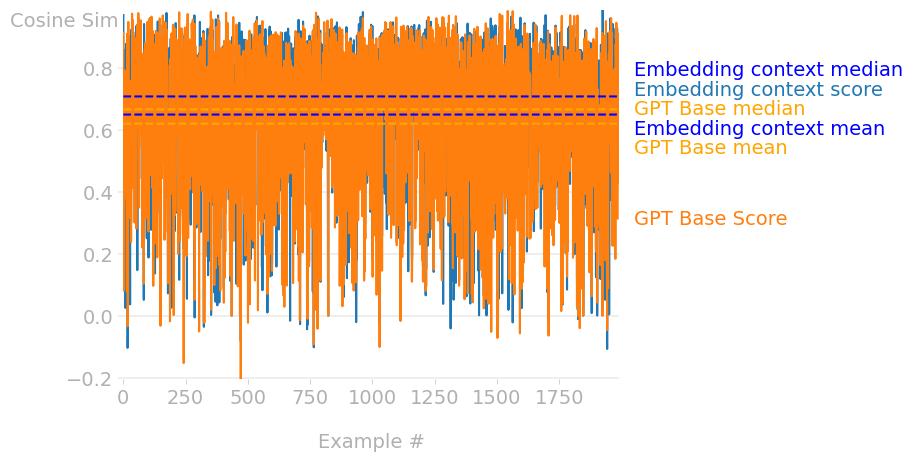

In [ ]:
import matplotx
import scipy.ndimage
import matplotlib.pyplot as plt
import numpy as np
labels = ["Embedding context score", "GPT Base Score"]


y = (scipy.ndimage.gaussian_filter(df['score'], sigma=0), scipy.ndimage.gaussian_filter(df['score_gpt_base'], sigma=0))
x0 = np.linspace(0, 1991, 1991)


with plt.style.context(matplotx.styles.dufte):
    for yy, label in zip(y, labels):
        plt.plot(x0, yy, label=label)

    plt.plot([np.median(df['score']) for i in range(len(df))], color='blue', linestyle='--', label='Embedding context median')
    plt.plot([np.mean(df['score']) for i in range(len(df))], color='blue', linestyle='--', label='Embedding context mean')
    plt.plot([np.median(df['score_gpt_base']) for i in range(len(df))], color='orange', linestyle='--', label='GPT Base median')
    plt.plot([np.mean(df['score_gpt_base']) for i in range(len(df))], color='orange', linestyle='--', label='GPT Base mean')

    plt.xlabel("Example #")
    matplotx.ylabel_top("Cosine Sim")  # move ylabel to the top, rotate
    matplotx.line_labels()  # line labels to the right
    plt.show()

In [ ]:
df.to_pickle('drive/MyDrive/benchmark/df_scores.pkl')